<a href="https://colab.research.google.com/github/tapickell/ml_python/blob/main/Chollet_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification
- IMDB dataset

In [2]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np
def multi_hot_encode(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = multi_hot_encode(train_data, dimension=10000)
x_test = multi_hot_encode(test_data, dimension=10000)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6857 - loss: 0.6262 - val_accuracy: 0.8586 - val_loss: 0.4060
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8928 - loss: 0.3371 - val_accuracy: 0.8831 - val_loss: 0.3065
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9290 - loss: 0.2245 - val_accuracy: 0.8912 - val_loss: 0.2797
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1640 - val_accuracy: 0.8883 - val_loss: 0.2775
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9638 - loss: 0.1311 - val_accuracy: 0.8867 - val_loss: 0.2890
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9757 - loss: 0.0994 - val_accuracy: 0.8845 - val_loss: 0.3075
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9854 - loss: 0.0762 - val_accuracy: 0.8818 - val_loss: 0.3302
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9899 - loss: 0.0582 - val_accuracy: 0.8809 - val_loss

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#### OVERFITTING

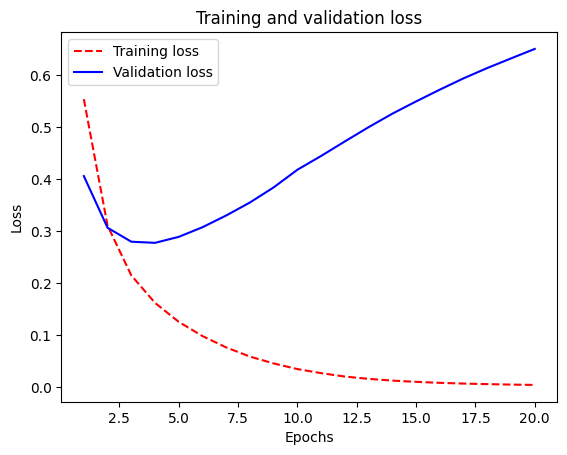

In [13]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r--', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("imdb_loss_plot.png", dpi=300)
plt.show()

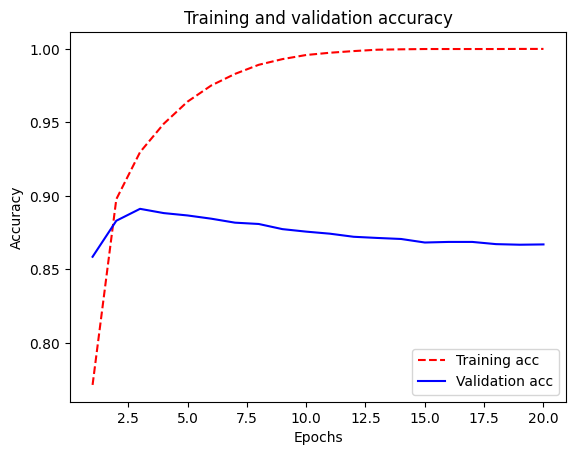

In [14]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("imdb_acc_plot.png", dpi=300)
plt.show()

In [51]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=8,
    batch_size=512,
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7393 - loss: 0.5570 - val_accuracy: 0.8770 - val_loss: 0.3259
Epoch 2/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9168 - loss: 0.2490 - val_accuracy: 0.8880 - val_loss: 0.2825
Epoch 3/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9471 - loss: 0.1768 - val_accuracy: 0.8895 - val_loss: 0.2780
Epoch 4/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9623 - loss: 0.1345 - val_accuracy: 0.8847 - val_loss: 0.2905
Epoch 5/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9734 - loss: 0.1055 - val_accuracy: 0.8826 - val_loss: 0.3052
Epoch 6/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9815 - loss: 0.0864 - val_accuracy: 0.8813 - val_loss: 0.3180
Epoch 7/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9875 - loss: 0.0672 - val_accuracy: 0.8798 - val_loss: 0.3359
Epoch 8/8
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9917 - loss: 0.0553 - val_accuracy: 0.8771 - val_loss: 0.356

## Multiclass Classification
- Rueters dataset

In [64]:
from keras.datasets import reuters
from keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) =  reuters.load_data(num_words=10000)


x_train = multi_hot_encode(train_data, dimension=10000)
x_test = multi_hot_encode(test_data, dimension=10000)

def one_hot_encode(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_categorical(train_labels)
y_test =  to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]




(7982, 10000)
(7982, 46)


In [65]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

top_3_acc = keras.metrics.TopKCategoricalAccuracy(k=3, name='top_3_accuracy')
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', top_3_acc])

In [66]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3165 - loss: 3.5487 - top_3_accuracy: 0.4565 - val_accuracy: 0.5420 - val_loss: 2.4530 - val_top_3_accuracy: 0.7140
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5870 - loss: 2.1213 - top_3_accuracy: 0.7404 - val_accuracy: 0.6450 - val_loss: 1.5836 - val_top_3_accuracy: 0.7650
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7060 - loss: 1.3784 - top_3_accuracy: 0.8031 - val_accuracy: 0.7080 - val_loss: 1.2923 - val_top_3_accuracy: 0.8130
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7660 - loss: 1.0556 - top_3_accuracy: 0.8467 - val_accuracy: 0.7490 - val_loss: 1.1418 - val_top_3_accuracy: 0.8480
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8158 - loss: 0.8673 - top_3_accuracy: 0.8906 - val_accuracy: 0.7760 - val_loss: 1.0531 - val_top_3_accuracy: 0.8690
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8642 - loss: 0.6447 - top_3_accurac

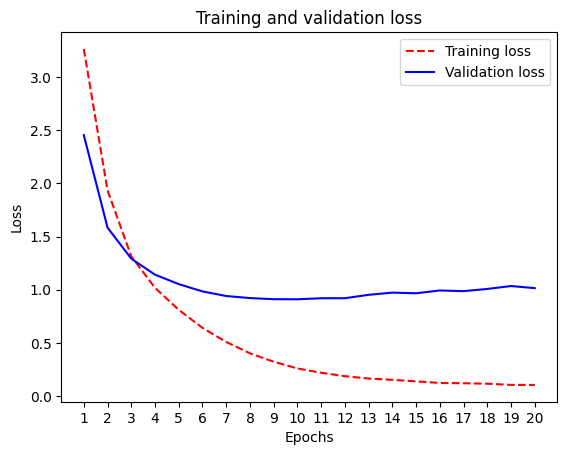

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Loss')
plt.legend()
plt.savefig("reuters_loss_plot.png", dpi=300)
plt.show()

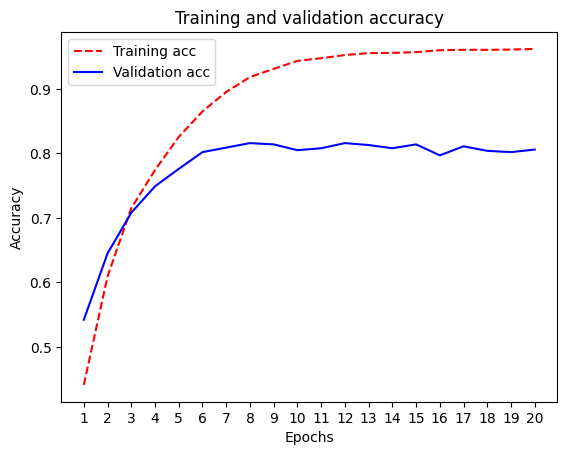

In [69]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("reuters_acc_plot.png", dpi=300)
plt.show()

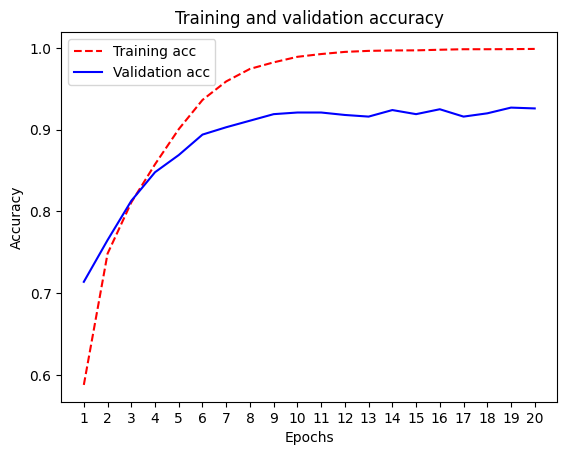

In [70]:
plt.clf()
acc = history.history['top_3_accuracy']
val_acc = history.history['val_top_3_accuracy']
plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("reuters_top3_acc_plot.png", dpi=300)
plt.show()

In [71]:
history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9627 - loss: 0.0954 - top_3_accuracy: 0.9987 - val_accuracy: 0.8030 - val_loss: 1.0280 - val_top_3_accuracy: 0.9230
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9617 - loss: 0.0907 - top_3_accuracy: 0.9990 - val_accuracy: 0.8020 - val_loss: 1.0585 - val_top_3_accuracy: 0.9260
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9671 - loss: 0.0840 - top_3_accuracy: 0.9992 - val_accuracy: 0.7980 - val_loss: 1.0549 - val_top_3_accuracy: 0.9260
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9648 - loss: 0.0826 - top_3_accuracy: 0.9993 - val_accuracy: 0.7950 - val_loss: 1.0810 - val_top_3_accuracy: 0.9230
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9645 - loss: 0.0864 - top_3_accuracy: 0.9989 - val_accuracy: 0.8020 - val_loss: 1.0587 - val_top_3_accuracy: 0.9220
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9646 - loss: 0.0797 - top_3_accuracy: 

In [78]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.18833481745325023

In [79]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [80]:
predictions[0].shape

(46,)

In [81]:
np.sum(predictions[0])

0.99999994

In [82]:
np.argmax(predictions[0])

3

## Regression

In [83]:
from keras.datasets import california_housing

(train_data, train_targets), (test_data, test_targets) = california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [87]:
# Feature wise normalization;
# subtract the mean and div by the std deviation of a feature (column)
# NOTE - the train_data is used to compute for normalizing the test_data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

# scale the targets to match the normlized inputs
y_train = train_targets / 100_000
y_test = test_targets / 100_000

In [90]:
# Scalar regression model
# Linear layer, no activation

def get_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

In [101]:
def kfold_training(k, num_epochs, model, x_train, y_train):
  all_scores = []
  all_mae_history = []
  num_val_samples = len(x_train) // k
  for i in range(k):
      print(f"processing fold #{i + 1}")
      fold_x_val = x_train[i * num_val_samples: (i + 1) * num_val_samples]
      fold_y_val = y_train[i * num_val_samples: (i + 1) * num_val_samples]
      fold_x_train = np.concatenate(
          [x_train[:1 * num_val_samples],
          x_train[(i + 1) * num_val_samples:]],
          axis=0)
      fold_y_train = np.concatenate(
          [y_train[:1 * num_val_samples],
          y_train[(i + 1) * num_val_samples:]],
          axis=0)
      model = get_model()
      history = model.fit(fold_x_train, fold_y_train, epochs=num_epochs, batch_size=16, verbose=0)
      scores = model.evaluate(fold_x_val, fold_y_val, verbose=0)
      val_loss, val_mae = scores
      all_scores.append(val_mae)
      mae_history = history.history["mean_absolute_error"]
      all_mae_history.append(mae_history)
  return all_scores, all_mae_history


In [106]:
# K-fold validation
all_scores, all_mae_history = kfold_training(4, 50, get_model, x_train, y_train)

processing fold #1
processing fold #2
processing fold #3
processing fold #4


In [103]:
[round(value, 3) for value in all_scores]

[0.326, 0.342, 0.364, 0.388]

In [104]:
round(np.mean(all_scores), 3)

0.355

In [109]:
all_scores, all_mae_history = kfold_training(4, 200, get_model, x_train, y_train)


processing fold #1
processing fold #2
processing fold #3
processing fold #4


In [107]:

[round(value, 3) for value in all_scores]

[0.328, 0.349, 0.359, 0.398]

In [108]:

round(np.mean(all_scores), 3)

0.358

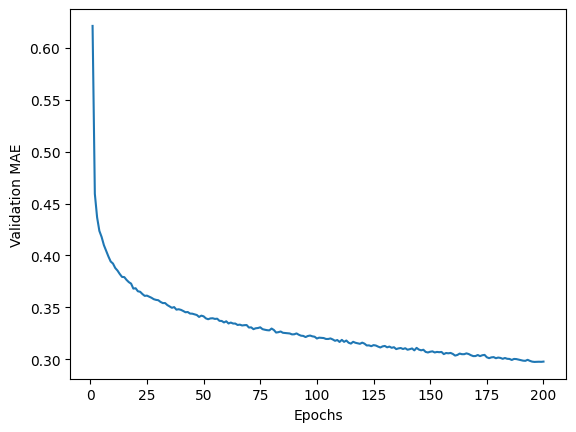

In [111]:
average_mae_history = [np.mean([x[i] for x in all_mae_history]) for i in range(200)]

epochs = range(1, len(average_mae_history) + 1)
plt.plot(epochs, average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.savefig("california_housing_validation_mae_plot.png", dpi=300)
plt.show()

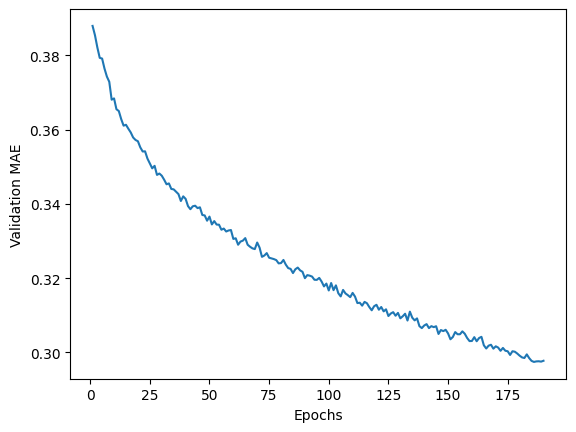

In [115]:
truncated_mae_history = average_mae_history[10:]
epochs = range(1, len(truncated_mae_history) + 1)
plt.plot(epochs, truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.savefig("california_housing_validation_mae_truncated_plot.png", dpi=300)